In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import calendar

In [53]:
hurr_df_full = pd.read_csv('assets/atlantic.csv')
hurr_df_full.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [54]:
hurr_df = hurr_df_full.drop(columns=['ID', 'Time', 'Event', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'], axis = 1,)

In [55]:
hurr_df = hurr_df.dropna(subset=["Date"])


In [56]:
hurr_df['Date'] = pd.to_datetime(hurr_df['Date'].astype(str), format = '%Y %m %d')
hurr_df

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure
0,UNNAMED,1851-06-25,HU,28.0N,94.8W,80,-999
1,UNNAMED,1851-06-25,HU,28.0N,95.4W,80,-999
2,UNNAMED,1851-06-25,HU,28.0N,96.0W,80,-999
3,UNNAMED,1851-06-25,HU,28.1N,96.5W,80,-999
4,UNNAMED,1851-06-25,HU,28.2N,96.8W,80,-999
...,...,...,...,...,...,...,...
49100,KATE,2015-11-12,EX,41.3N,50.4W,55,981
49101,KATE,2015-11-12,EX,41.9N,49.9W,55,983
49102,KATE,2015-11-13,EX,41.5N,49.2W,50,985
49103,KATE,2015-11-13,EX,40.8N,47.5W,45,985


In [57]:
hurr_df['Year'] = hurr_df['Date'].map(lambda x: x.year)
hurr_df['Month'] = hurr_df['Date'].map(lambda x: x.month)
hurr_df['Day'] = hurr_df['Date'].map(lambda x: x.day)
hurr_df.head()

,Name,Date,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,Year,Month,Day
0,UNNAMED,1851-06-25,HU,28.0N,94.8W,80,-999,1851,6,25
1,UNNAMED,1851-06-25,HU,28.0N,95.4W,80,-999,1851,6,25
2,UNNAMED,1851-06-25,HU,28.0N,96.0W,80,-999,1851,6,25
3,UNNAMED,1851-06-25,HU,28.1N,96.5W,80,-999,1851,6,25
4,UNNAMED,1851-06-25,HU,28.2N,96.8W,80,-999,1851,6,25


In [58]:
cols_to_check = ['Maximum Wind', 'Minimum Pressure']
negative_mask = (hurr_df[cols_to_check] < 0)
hurr_df[cols_to_check] = hurr_df[cols_to_check].mask(negative_mask, np.nan)


In [59]:
hurr_df['Latitude'] = hurr_df['Latitude'].str[:-1].astype(float)
hurr_df['Longitude'] = hurr_df['Longitude'].str[:-1].astype(float)

In [60]:
hurr_df.describe()

,Latitude,Longitude,Maximum Wind,Minimum Pressure,Year,Month,Day
count,49105.000000,49105.000000,48767.000000,18436.000000,49105.000000,49105.000000,49105.000000
mean,27.044904,65.711080,53.051695,992.244250,1949.712962,8.747724,15.706079
std,10.077880,19.591744,24.747884,19.113748,44.619282,1.340241,8.753441
min,7.200000,0.000000,10.000000,882.000000,1851.000000,1.000000,1.000000
25%,19.100000,52.500000,35.000000,984.000000,1911.000000,8.000000,8.000000
50%,26.400000,68.000000,50.000000,999.000000,1956.000000,9.000000,16.000000
75%,33.100000,81.000000,70.000000,1006.000000,1989.000000,10.000000,23.000000
max,81.000000,359.100000,165.000000,1024.000000,2015.000000,12.000000,31.000000


In [61]:
sorted_hurr = hurr_df.groupby("Date")["Maximum Wind"].max().reset_index()
sorted_hurr['Year'] = sorted_hurr['Date'].map(lambda x: x.year)
sorted_hurr['Month'] = sorted_hurr['Date'].map(lambda x: x.month)
sorted_hurr['Day'] = sorted_hurr['Date'].map(lambda x: x.day)
sorted_hurr


,Date,Maximum Wind,Year,Month,Day
0,1851-06-25,80.0,1851,6,25
1,1851-06-26,70.0,1851,6,26
2,1851-06-27,50.0,1851,6,27
3,1851-06-28,40.0,1851,6,28
4,1851-07-05,80.0,1851,7,5
...,...,...,...,...,...
9978,2015-11-09,45.0,2015,11,9
9979,2015-11-10,60.0,2015,11,10
9980,2015-11-11,75.0,2015,11,11
9981,2015-11-12,65.0,2015,11,12


In [62]:
sorted_hurr['category'] = None

for index, row in sorted_hurr.iterrows():
    wind_speed = row['Maximum Wind']
    if wind_speed < 74:
        sorted_hurr.at[index, 'category'] = 'tropical storm'
    elif wind_speed >= 74 and wind_speed <= 95:
        sorted_hurr.at[index, 'category'] = 1
    elif wind_speed >= 96 and wind_speed <= 110:
        sorted_hurr.at[index, 'category'] = 2
    elif wind_speed >= 111 and wind_speed <= 129:
        sorted_hurr.at[index, 'category'] = 3
    elif wind_speed >= 130 and wind_speed <= 156:
        sorted_hurr.at[index, 'category'] = 4
    elif wind_speed >= 157:
        sorted_hurr.at[index, 'category'] = 5
        
sorted_hurr.head()

,Date,Maximum Wind,Year,Month,Day,category
0,1851-06-25,80.0,1851,6,25,1
1,1851-06-26,70.0,1851,6,26,tropical storm
2,1851-06-27,50.0,1851,6,27,tropical storm
3,1851-06-28,40.0,1851,6,28,tropical storm
4,1851-07-05,80.0,1851,7,5,1


In [63]:
sorted_hurr.dropna(subset=['category'], inplace=True)

In [64]:
fig = px.histogram(sorted_hurr, x='category', color='category',
                   labels={'category': 'Hurricane Category'},
                   category_orders={'category': ['tropical storm', 1, 2, 3, 4, 5]})

fig.show()

In [65]:


fig = px.histogram(sorted_hurr, x="Maximum Wind", color="category",
                   nbins=50, barmode="overlay",
                   category_orders={'category': ['tropical storm', 1, 2, 3, 4, 5]},
                   labels={'category': 'Hurricane Category',
                           'Maximum Wind': 'Maximum Wind Speed (mph)',
                           'count': 'Count'})

fig.update_layout(xaxis_title="Wind Speed (mph)",
                  yaxis_title="Count")

fig.show()


# Looking at tropical storms vs hurricanes

In [66]:
storms_by_year = sorted_hurr.groupby(['Year', 'category']).size().reset_index(name='count')

tropical_storms = storms_by_year[storms_by_year['category'] == 'tropical storm']
categories_1_5 = storms_by_year[storms_by_year['category'].isin([1,2,3,4,5])]

freq_tropical = tropical_storms[['Year', 'count']].rename(columns={'count': 'tropical storm'})
freq_cat = categories_1_5.pivot(index='Year', columns='category', values='count')
freq_cat.columns = ['category '+str(i) for i in freq_cat.columns]

freq_df = freq_tropical.merge(freq_cat, on='Year', how='outer')
freq_df = freq_df.fillna(0)

freq_df.head()


/Users/danielbrechner/opt/anaconda3/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



,Year,tropical storm,category 1,category 2,category 3,category 4,category 5
0,1851,19,6.0,1.0,0.0,0.0,0.0
1,1852,18,13.0,3.0,0.0,0.0,0.0
2,1853,11,5.0,5.0,3.0,1.0,0.0
3,1854,9,5.0,2.0,0.0,0.0,0.0
4,1855,5,3.0,2.0,0.0,0.0,0.0


In [67]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=freq_df.index,
        y=freq_df['tropical storm'],
        name='Tropical Storms'
    )
)

for i in range(1, 6):
    fig.add_trace(
        go.Bar(
            x=freq_df.index,
            y=freq_df['category '+str(i)],
            name='Category '+str(i)+' Hurricanes'
        )
    )


fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Frequency of Occurrence',
    barmode='stack'
)

fig.show()


While tropical storms may not be of significant intensity, we can see a clear increase in the amount of these storms over time

# Looking at maximum wind speed by year

In [68]:
fig = px.scatter(sorted_hurr, x="Year", y="Maximum Wind",
                 title="Maximum Hurricane Wind Speed by Year")


fig.show()

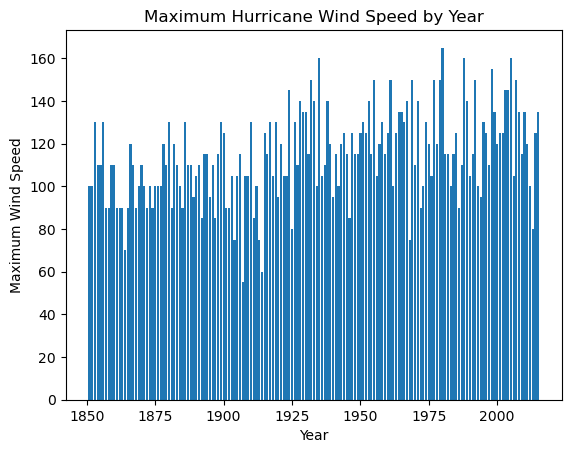

In [69]:
max_winds_by_year = sorted_hurr.groupby('Year')['Maximum Wind'].max()

plt.bar(max_winds_by_year.index, max_winds_by_year.values)

plt.title('Maximum Hurricane Wind Speed by Year')
plt.xlabel('Year')
plt.ylabel('Maximum Wind Speed')

plt.show()

In [70]:
sorted_hurr['Decade'] = (sorted_hurr['Year'] // 10) * 10
max_wind_by_decade = sorted_hurr.groupby('Decade')['Maximum Wind'].max()
max_wind_by_decade

Decade
1850    130.0
1860    120.0
1870    120.0
1880    130.0
1890    130.0
1900    125.0
1910    130.0
1920    145.0
1930    160.0
1940    125.0
1950    150.0
1960    150.0
1970    150.0
1980    165.0
1990    155.0
2000    160.0
2010    135.0
Name: Maximum Wind, dtype: float64

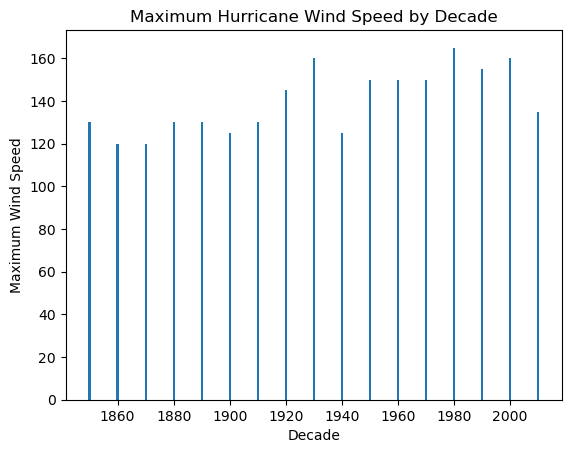

In [71]:
plt.bar(max_wind_by_decade.index, max_wind_by_decade.values)
plt.xlabel('Decade')
plt.ylabel('Maximum Wind Speed')
plt.title('Maximum Hurricane Wind Speed by Decade')
plt.show()

In [72]:
bar_trace = go.Bar(x=max_wind_by_decade.index, y=max_wind_by_decade.values)

layout = go.Layout(title="Maximum Hurricane Wind Speed by Decade", xaxis=dict(title="Decade"), yaxis=dict(title="Maximum Wind Speed"))

fig = go.Figure(data=[bar_trace], layout=layout)

fig.show()

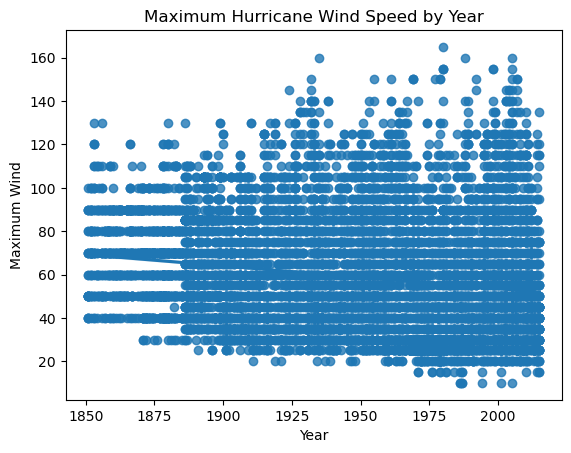

In [73]:
sns.regplot(data=sorted_hurr, x="Year", y="Maximum Wind")

plt.title("Maximum Hurricane Wind Speed by Year")
plt.xlabel("Year")
plt.ylabel("Maximum Wind")

plt.show()

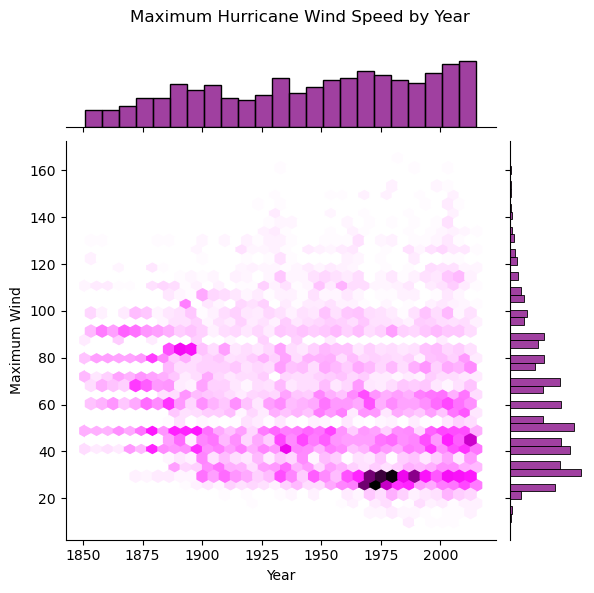

In [74]:
sns.jointplot(data=sorted_hurr, x="Year", y="Maximum Wind", kind="hex", color="purple")

plt.subplots_adjust(top=0.9)
plt.suptitle("Maximum Hurricane Wind Speed by Year")
plt.xlabel("Year")
plt.ylabel("Maximum Wind")

plt.show()

In [75]:
fig = px.density_heatmap(sorted_hurr, x="Year", y="Maximum Wind", nbinsx=50, nbinsy=50, color_continuous_scale="Purples")

fig.update_layout(title="Maximum Hurricane Wind Speed by Year",
                  xaxis_title="Year",
                  yaxis_title="Maximum Wind")


fig.show()